This is purely an **EDA project** , where in I would be drawing inferences on what advices I can provide to a person who plans on deploying an app on playstore.

The dataset used in this project can be downloaded from 
<a href="https://www.kaggle.com/lava18/google-play-store-apps?select=googleplaystore.csv">here</a>.

The various columns originally present alongwith their descriptions are as follows - 

<li>App - Application name</li>

<li>Category - Category the app belongs to</li>

<li>Rating - Overall user rating of the app (as when scraped)</li>

<li>Reviews - Number of user reviews for the app (as when scraped)</li>

<li>Size -Size of the app (as when scraped)</li>

<li>Installs - Number of user downloads/installs for the app (as when scraped)</li>

<li>Type - Paid or Free</li>

<li>Price - Price of the app (as when scraped)</li>

<li>Content Rating - Age group the app is targeted at - Children / Mature 21+ / Adult</li>

<li>Genres - An app can belong to multiple genres (apart from its main category). For eg, a musical family game will belong to Music, Game, Family genres.</li>

<li>Last Update</li>

<li>Current Ver</li> 
<li>Android Ver</li> 

#### Importing pandas library to handle the dataset.

In [1]:
import pandas as pd

#### Loading my dataset to be used ,i.e, googleplaystore.csv.  

In [2]:
df=pd.read_csv('googleplaystore.csv')

In [3]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


#### Checking the overall shape of my dataframe.

In [4]:
df.shape

(10841, 13)

#### Feature Extraction

In this dataset, I find the following columns irrelevant to a large extent to my project, so I would just drop those columns and update it in my dataframe.

In [5]:
df = df.drop(['App','Last Updated','Current Ver','Android Ver'],axis=1)

I have dropped the App column as well because I anyways don't have to suggest the person which application to go forward with, rather, I have to draw inferences based on the category and other features.

Now, checking for the information about my dataset, i.e., see a summary of my dataset (including names of columns, number of entries in my dataset, datatype of each entry, etc...)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        10841 non-null  object 
 1   Rating          9367 non-null   float64
 2   Reviews         10841 non-null  object 
 3   Size            10841 non-null  object 
 4   Installs        10841 non-null  object 
 5   Type            10840 non-null  object 
 6   Price           10841 non-null  object 
 7   Content Rating  10840 non-null  object 
 8   Genres          10841 non-null  object 
dtypes: float64(1), object(8)
memory usage: 762.4+ KB


Although number of null entries in each column can be calculated from the above line itself, but to make it easier, just checking for the exact numbers.

#### Handling missing values

In [7]:
df.isnull().sum()

Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
dtype: int64

It can be clearly seen that about 10% of the entries in Rating column are null values.

I could drop those entries directly, but, I would first like to use hit and trial approach and check whether droping those entries is effecting my data to a large extent or not.

For doing so, here I am checking if dropping these null values is affecting the number of categories present in my dataset or not.

In [8]:
df['Category'].nunique()

34

So, originally the applications in the dataset are spread across 34 categories.

Now, dropping all the entries with null values.

Again checking for the number of apps and categories after dropping the null values.

In [9]:
df1=df.dropna()

In [10]:
df1['Category'].nunique()

33

There is just one missing category.

Checking which category I have lost in this process, and also seeing whether that category was valuable or not.

In [11]:
df['Category'].value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

In [12]:
df1['Category'].value_counts()

FAMILY                 1747
GAME                   1097
TOOLS                   734
PRODUCTIVITY            351
MEDICAL                 350
COMMUNICATION           328
FINANCE                 323
SPORTS                  319
PHOTOGRAPHY             317
LIFESTYLE               314
PERSONALIZATION         314
BUSINESS                303
HEALTH_AND_FITNESS      297
SOCIAL                  259
SHOPPING                238
NEWS_AND_MAGAZINES      233
TRAVEL_AND_LOCAL        226
DATING                  195
BOOKS_AND_REFERENCE     178
VIDEO_PLAYERS           160
EDUCATION               155
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     124
FOOD_AND_DRINK          109
HOUSE_AND_HOME           76
WEATHER                  75
AUTO_AND_VEHICLES        73
LIBRARIES_AND_DEMO       65
ART_AND_DESIGN           62
COMICS                   58
PARENTING                50
EVENTS                   45
BEAUTY                   42
Name: Category, dtype: int64

When checked thoroughly, the category named **'1.9'** has been dropped, which contained just one item, so dropping null values won't effect the inferences much.

In [13]:
df.dropna(inplace=True)

In [14]:
df.isnull().sum()

Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
dtype: int64

It can be seen that I am completely rid of null values in any column now.

In [15]:
df

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design
1,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play
2,ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design
3,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design
4,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity
...,...,...,...,...,...,...,...,...,...
10834,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education
10836,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education
10837,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education
10839,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference


#### Checking the various classes present in each column of the dataset to get a better understanding of which way to use which feature, as well as, get to know if some changes need to be made in the data present in any column.

In [16]:
df.columns

Index(['Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price',
       'Content Rating', 'Genres'],
      dtype='object')

In [17]:
list(df['Category'].unique())

['ART_AND_DESIGN',
 'AUTO_AND_VEHICLES',
 'BEAUTY',
 'BOOKS_AND_REFERENCE',
 'BUSINESS',
 'COMICS',
 'COMMUNICATION',
 'DATING',
 'EDUCATION',
 'ENTERTAINMENT',
 'EVENTS',
 'FINANCE',
 'FOOD_AND_DRINK',
 'HEALTH_AND_FITNESS',
 'HOUSE_AND_HOME',
 'LIBRARIES_AND_DEMO',
 'LIFESTYLE',
 'GAME',
 'FAMILY',
 'MEDICAL',
 'SOCIAL',
 'SHOPPING',
 'PHOTOGRAPHY',
 'SPORTS',
 'TRAVEL_AND_LOCAL',
 'TOOLS',
 'PERSONALIZATION',
 'PRODUCTIVITY',
 'PARENTING',
 'WEATHER',
 'VIDEO_PLAYERS',
 'NEWS_AND_MAGAZINES',
 'MAPS_AND_NAVIGATION']

In [18]:
list(df['Size'].unique())

['19M',
 '14M',
 '8.7M',
 '25M',
 '2.8M',
 '5.6M',
 '29M',
 '33M',
 '3.1M',
 '28M',
 '12M',
 '20M',
 '21M',
 '37M',
 '2.7M',
 '5.5M',
 '17M',
 '39M',
 '31M',
 '4.2M',
 '23M',
 '6.0M',
 '6.1M',
 '4.6M',
 '9.2M',
 '5.2M',
 '11M',
 '24M',
 'Varies with device',
 '9.4M',
 '15M',
 '10M',
 '1.2M',
 '26M',
 '8.0M',
 '7.9M',
 '56M',
 '57M',
 '35M',
 '54M',
 '201k',
 '3.6M',
 '5.7M',
 '8.6M',
 '2.4M',
 '27M',
 '2.5M',
 '7.0M',
 '16M',
 '3.4M',
 '8.9M',
 '3.9M',
 '2.9M',
 '38M',
 '32M',
 '5.4M',
 '18M',
 '1.1M',
 '2.2M',
 '4.5M',
 '9.8M',
 '52M',
 '9.0M',
 '6.7M',
 '30M',
 '2.6M',
 '7.1M',
 '22M',
 '6.4M',
 '3.2M',
 '8.2M',
 '4.9M',
 '9.5M',
 '5.0M',
 '5.9M',
 '13M',
 '73M',
 '6.8M',
 '3.5M',
 '4.0M',
 '2.3M',
 '2.1M',
 '42M',
 '9.1M',
 '55M',
 '23k',
 '7.3M',
 '6.5M',
 '1.5M',
 '7.5M',
 '51M',
 '41M',
 '48M',
 '8.5M',
 '46M',
 '8.3M',
 '4.3M',
 '4.7M',
 '3.3M',
 '40M',
 '7.8M',
 '8.8M',
 '6.6M',
 '5.1M',
 '61M',
 '66M',
 '79k',
 '8.4M',
 '3.7M',
 '118k',
 '44M',
 '695k',
 '1.6M',
 '6.2M',
 '53M

In [19]:
list(df['Installs'].unique())

['10,000+',
 '500,000+',
 '5,000,000+',
 '50,000,000+',
 '100,000+',
 '50,000+',
 '1,000,000+',
 '10,000,000+',
 '5,000+',
 '100,000,000+',
 '1,000,000,000+',
 '1,000+',
 '500,000,000+',
 '100+',
 '500+',
 '10+',
 '5+',
 '50+',
 '1+']

In [20]:
list(df['Type'].unique())

['Free', 'Paid']

In [21]:
list(df['Price'].unique())

['0',
 '$4.99',
 '$3.99',
 '$6.99',
 '$7.99',
 '$5.99',
 '$2.99',
 '$3.49',
 '$1.99',
 '$9.99',
 '$7.49',
 '$0.99',
 '$9.00',
 '$5.49',
 '$10.00',
 '$24.99',
 '$11.99',
 '$79.99',
 '$16.99',
 '$14.99',
 '$29.99',
 '$12.99',
 '$2.49',
 '$10.99',
 '$1.50',
 '$19.99',
 '$15.99',
 '$33.99',
 '$39.99',
 '$3.95',
 '$4.49',
 '$1.70',
 '$8.99',
 '$1.49',
 '$3.88',
 '$399.99',
 '$17.99',
 '$400.00',
 '$3.02',
 '$1.76',
 '$4.84',
 '$4.77',
 '$1.61',
 '$2.50',
 '$1.59',
 '$6.49',
 '$1.29',
 '$299.99',
 '$379.99',
 '$37.99',
 '$18.99',
 '$389.99',
 '$8.49',
 '$1.75',
 '$14.00',
 '$2.00',
 '$3.08',
 '$2.59',
 '$19.40',
 '$3.90',
 '$4.59',
 '$15.46',
 '$3.04',
 '$13.99',
 '$4.29',
 '$3.28',
 '$4.60',
 '$1.00',
 '$2.95',
 '$2.90',
 '$1.97',
 '$2.56',
 '$1.20']

In [22]:
list(df['Content Rating'].unique())

['Everyone',
 'Teen',
 'Everyone 10+',
 'Mature 17+',
 'Adults only 18+',
 'Unrated']

In [23]:
list(df['Genres'].unique())

['Art & Design',
 'Art & Design;Pretend Play',
 'Art & Design;Creativity',
 'Auto & Vehicles',
 'Beauty',
 'Books & Reference',
 'Business',
 'Comics',
 'Comics;Creativity',
 'Communication',
 'Dating',
 'Education;Education',
 'Education',
 'Education;Creativity',
 'Education;Music & Video',
 'Education;Action & Adventure',
 'Education;Pretend Play',
 'Education;Brain Games',
 'Entertainment',
 'Entertainment;Music & Video',
 'Entertainment;Brain Games',
 'Entertainment;Creativity',
 'Events',
 'Finance',
 'Food & Drink',
 'Health & Fitness',
 'House & Home',
 'Libraries & Demo',
 'Lifestyle',
 'Lifestyle;Pretend Play',
 'Adventure;Action & Adventure',
 'Arcade',
 'Casual',
 'Card',
 'Casual;Pretend Play',
 'Action',
 'Strategy',
 'Puzzle',
 'Sports',
 'Music',
 'Word',
 'Racing',
 'Casual;Creativity',
 'Casual;Action & Adventure',
 'Simulation',
 'Adventure',
 'Board',
 'Trivia',
 'Role Playing',
 'Simulation;Education',
 'Action;Action & Adventure',
 'Casual;Brain Games',
 'Simulati

It is understood that changes to need to be made in atleast two columns, namely, Size and Installs.

###### Size column
Rescaling actual values of 'M' and 'k' in the size column,i.e., if the size of one app is 12M while of another app is 12k, if we just simply remove the 'M' and 'k' at the end of both the values, we would end up with having the size of both the apps as the same, which would be a blunder.

Also, it is seen that there's a value that says 'Varies with device' so, initializing it to be 0(just a way to handle it).

In [24]:
df['Size'] = df['Size'].map(lambda x: x.rstrip('M'))
df['Size'] = df['Size'].map(lambda x: str(round((float(x.rstrip('k'))/1024), 1)) if x[-1]=='k' else x)
df['Size'] = df['Size'].map(lambda x: 0 if x.startswith('Varies') else x)

###### Install column
This column doesn't need much to be done on it other than the fact that there is a '+' sign at the end of each number of installs. Even if we remove the '+' sign, it wouldn't make any difference since the values have already been rounded off.

In [25]:
df['Installs'] = df['Installs'].map(lambda x: (x.rstrip('+')))
df['Installs'] = df['Installs'].map(lambda x: ''.join(x.split(','))) #since the figures are written in readable format which we will not be able to convert into numeric value otherwise

###### Just converting features to their appropriate data type.

In [26]:
df['Installs'] = pd.to_numeric(df['Installs'])
df['Rating'] = pd.to_numeric(df['Rating'])
df['Reviews'] = pd.to_numeric(df['Reviews'])
# df[''] = pd.to_numeric(df['Installs'])

In [27]:
df.dtypes

Category           object
Rating            float64
Reviews             int64
Size               object
Installs            int64
Type               object
Price              object
Content Rating     object
Genres             object
dtype: object

###### Taking a glance at the final dataset that I am going to use to draw infernces from.

In [28]:
df

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,ART_AND_DESIGN,4.1,159,19,10000,Free,0,Everyone,Art & Design
1,ART_AND_DESIGN,3.9,967,14,500000,Free,0,Everyone,Art & Design;Pretend Play
2,ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0,Everyone,Art & Design
3,ART_AND_DESIGN,4.5,215644,25,50000000,Free,0,Teen,Art & Design
4,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0,Everyone,Art & Design;Creativity
...,...,...,...,...,...,...,...,...,...
10834,FAMILY,4.0,7,2.6,500,Free,0,Everyone,Education
10836,FAMILY,4.5,38,53,5000,Free,0,Everyone,Education
10837,FAMILY,5.0,4,3.6,100,Free,0,Everyone,Education
10839,BOOKS_AND_REFERENCE,4.5,114,0,1000,Free,0,Mature 17+,Books & Reference


The dataset looks beautiful doesn't it?

### Data Visualization

Now, importing various visualization libraries to draw concrete inferences from our transformed dataset.

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

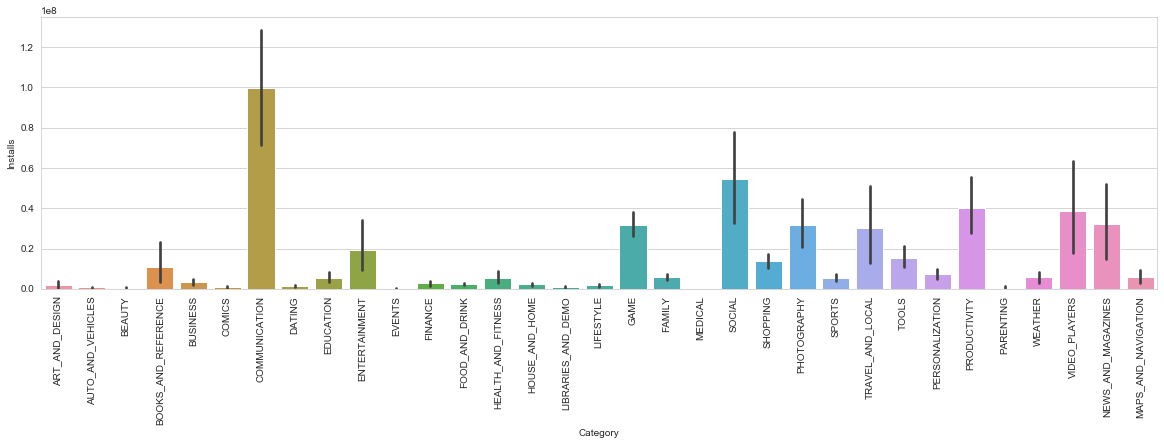

In [30]:
fig, ax = plt.subplots(figsize=(20,5))
sns.barplot(x='Category', y='Installs', data=df,ax=ax);
plt.xticks(rotation=90);

**From here it is seen that applications of the category 'BOOKS_AND_REFERENCE', 'COMMUNICATIONS', 'ENTERTAINMENT','GAME', 'FAMILY', 'SOCIAL', 'PHOTOGRAPHY', 'TRAVEL_AND_LOCAL', 'TOOL', 'PRODUCTIVITY', 'VIDEOO_PLAYERS' and 'NEWS_AND_MAGAZINES' are installed the most(1billion+ times). Alongwith these, 'HEALTH_AND_FITNESS' is also installed approximately 4.5milliion+ times.**

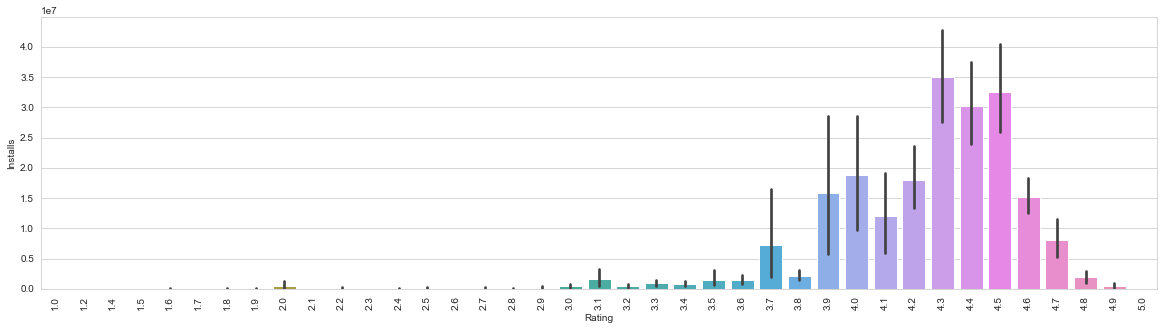

In [31]:
fig, ax = plt.subplots(figsize=(20,5))
sns.barplot(x='Rating', y='Installs', data=df,ax=ax);
plt.xticks(rotation=90);

**The inference drawn here is apps with rating 4.3,4.5,4.4 are installed 30million+ times, while those with ratings in the range of (3.9, 4.2) as well as of 4.6 are installed 1 million to 2 million+ times. All the others have their number of installations below 1 million.**

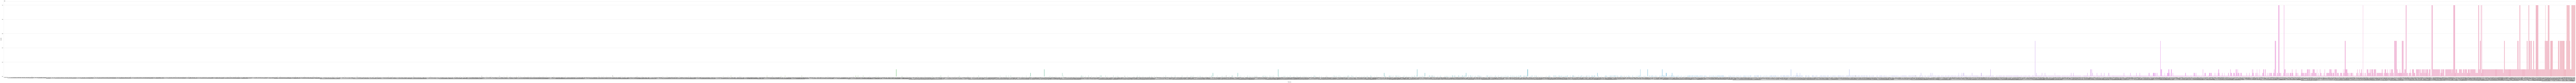

In [41]:
fig, ax = plt.subplots(figsize=(500,15))
sns.barplot(x='Reviews', y='Installs', data=df,ax=ax);
plt.xticks(rotation=90);

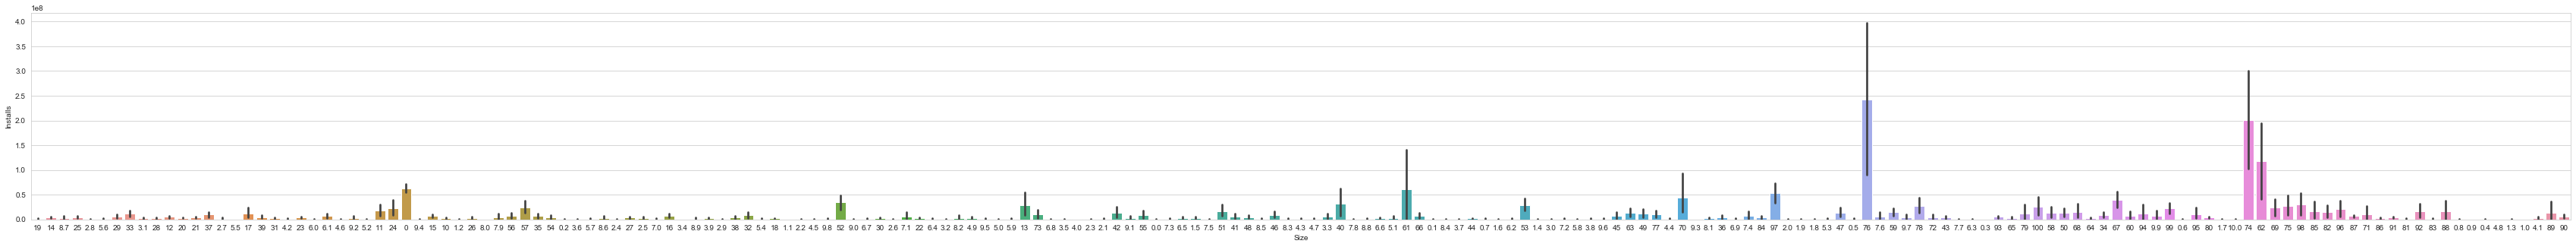

In [33]:
fig, ax = plt.subplots(figsize=(60,5))
sns.barplot(x='Size', y='Installs', data=df,ax=ax);
# plt.xticks(rotation=90);

**Apps with size(in Mb) 76,74,72 are installed more than 1 million+ times, the second class of size(in Mb) would be 0,61,70,97,98 that are installed in between 0.5 to 1 million times, the rest of the apps are installed less than 0.5million times with some never being installed.**

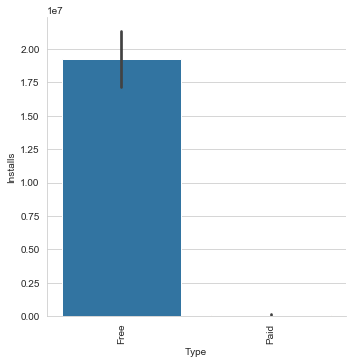

In [34]:
sns.catplot(x='Type', y='Installs', data=df,kind='bar');
plt.xticks(rotation=90);

**As was expected, Free apps are installed more than paid apps.**

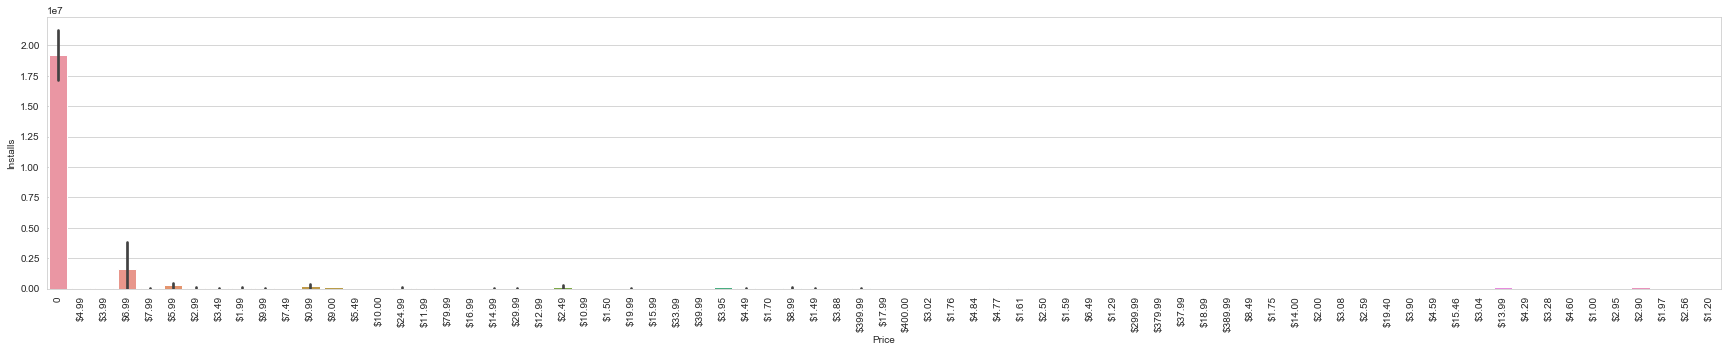

In [35]:
fig, ax = plt.subplots(figsize=(30,5))
sns.barplot(x='Price', y='Installs', data=df,ax=ax);
plt.xticks(rotation=90);

**Again, largely, unpaid apps are installed. Having said that, some paid apps having a cost in range of $$0.99  to  $13.99 are downloaded less than 0.25million times**

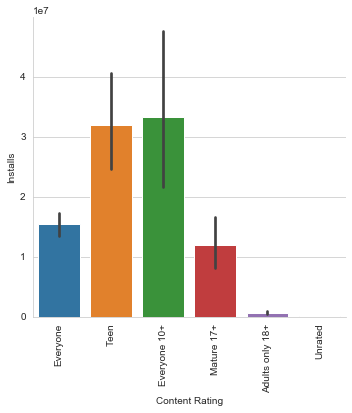

In [36]:
sns.catplot(x='Content Rating', y='Installs', data=df,kind='bar');
plt.xticks(rotation=90);

**Apps targeted at any age groups other than those labelled 'Adults only 18+' and 'Unrated' are installed.**
**It can however be seen that apps labelled 'Teen' and 'Everyone 10+' are installed 30 million+ times.**

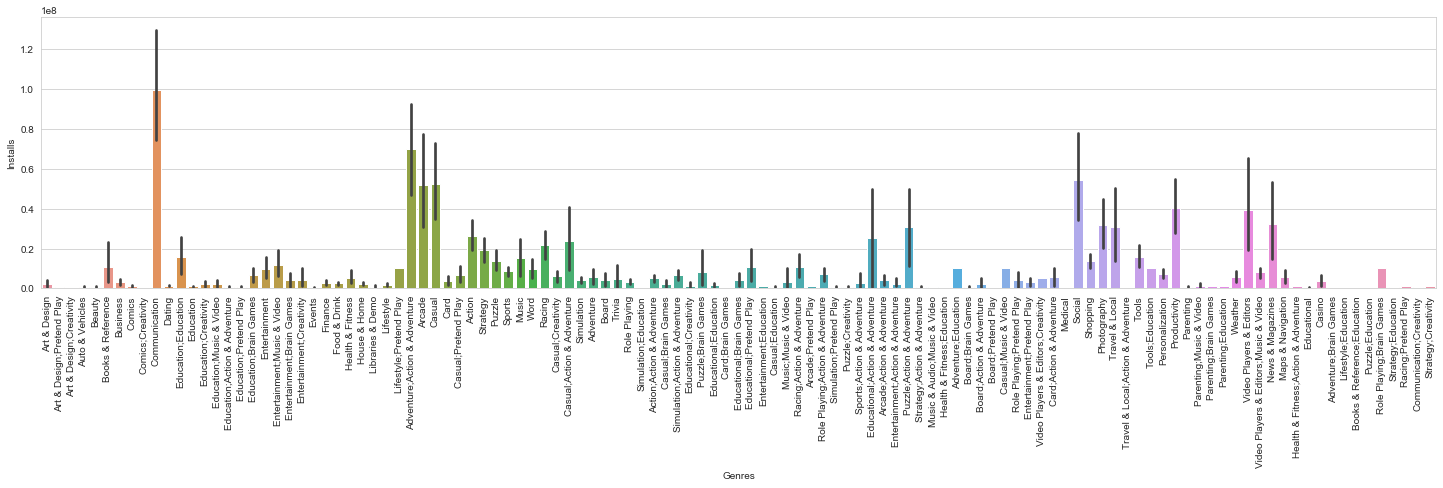

In [37]:
fig, ax = plt.subplots(figsize=(25,5))
sns.barplot(x='Genres', y='Installs', data=df,ax=ax);
plt.xticks(rotation=90);

**Apps with their genres as 'Communication' do exceptionally well.**
**Other genres worth building an app for are 'Adventure:Action&Adventure', 'Arcacde', 'Casual', 'Educational:Action&Adventure', 'Casual:Action&Adventure', 'Puzzle:Action&Adventure', 'Social', 'Photography', 'Travel&Local', 'Productivity', 'Video Players & Editors' and 'News & Magazines'.**

## To a person deploying an app on Playstore, I would recommend him/her to build it with this specifications - 

#### Category - 
<li>BOOKS_AND_REFERENCE</li>
<li>COMMUNICATIONS</li>
<li>ENTERTAINMENT</li>
<li>GAME</li>
<li>FAMILY</li>
<li>SOCIAL</li>
<li>PHOTOGRAPHY</li>
<li>TRAVEL_AND_LOCAL</li>
<li>TOOL</li>
<li>PRODUCTIVITY</li>
<li>VIDEOO_PLAYERS</li>
<li>NEWS_AND_MAGAZINES</li>
<li>HEALTH_AND_FITNESS</li>

#### Genre - 
<li>Communication</li>
<li>Adventure:Action&Adventure</li>
<li>Arcacde</li>
<li>Casual</li>
<li>Educational:Action&Adventure</li>
<li>Casual:Action&Adventure</li>
<li>Puzzle:Action&Adventure</li>
<li>Social</li>
<li>Photography</li>
<li>Travel&Local</li>
<li>Productivity</li>
<li>Video Players & Editors</li>
<li>News & Magazines</li>

#### Size(in Mb) -
<li>within the range of 64 to 100</li>
<li>or, 0Mb</li>

#### Unpaid

#### Target Audience - 
<li>Teen</li>
<li>Everyone 10+</li>

# For people who already have an app on playstore, optimal 
<li>Ratings range for their app would be 3.9 to 4.7</li>
<li>and, Number of Reviews for their app should be in lakhs if possible</li>